<a href="https://colab.research.google.com/github/nasirxia/Analysis-Project-2022-Fall/blob/main/ALP-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/sample_data/Data0131.csv")
df.drop(["sale_id","sale_date","qty"], axis = 1, inplace=True)
df.head()


,ad_exp,product_id,product_brand,product_name,price,sales,customer_id,gender,city,st,zip,lat,lng,marital,education,income,age,prime
0,Sponsored Products,224143037,Seattle Gourmet,Seattle Gourmet Adult 7+ Small Bites Chicken M...,16.14,32.28,1223,M,Shreveport,LA,71130,32.6076,-93.7526,Single,College graduate,"$60,000 - $79,999",55-64,1
1,Don't recall seeing an ad,834182030,Garland Farms,Garland Farms Healthy Grains Dry Dog Food with...,21.83,65.49,2946,M,Fresno,CA,93794,36.7464,-119.6397,Single,High school graduate,"$60,000 - $79,999",35-44,1
2,Don't recall seeing an ad,950844039,Doggo,"Doggo Kibble Dry Dog Food, 20 lb, with Plant B...",57.99,173.97,4448,M,Danbury,CT,6816,41.3089,-73.3637,Single,College graduate,"Less than $20,000",25-34,1
3,Sponsored Products,378059009,Alpha,"Alpha Shredded Blend High Protein, Adult Dry D...",63.98,127.96,4510,F,San Antonio,TX,78215,29.4413,-98.4793,Married,College graduate,"$20,000 - $39,999",25-34,1
4,Don't recall seeing an ad,151595003,Alpha,"Alpha Natural Sensitive Systems, Skin & Coat S...",48.99,48.99,370,F,Boise,ID,83711,43.4599,-116.2440,Married,Some college or trade school,"$80,000 - $99,999",55-64,0


ad_exp
Display/banner ad            1297
Don't recall seeing an ad    3096
Some other type of ad          31
Sponsored Brands             2520
Sponsored Products           2017
Video ad                      254
dtype: int64


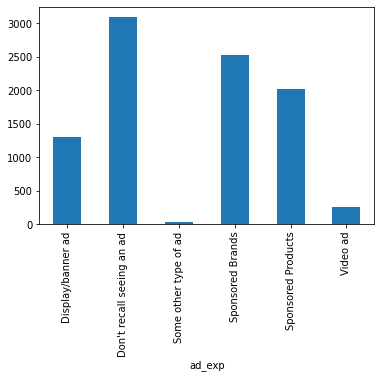

In [ ]:
#pd.get_dummies(df.ad_exp)
#Test if the types of ads differentiate the consumers

GroupedData1=df.groupby(by="ad_exp").size() # why size()?
print(GroupedData1)
GroupedData1.plot.bar()

product_id
106645074     40
110379090     42
118689054     59
122451027    113
123910010    246
dtype: int64


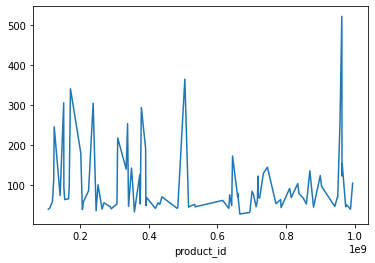

In [ ]:
#Test if the types of product differentiate the consumers
GroupedData2=df.groupby(by="product_id").size() # why size()?
print(GroupedData2.head())
len(GroupedData2) #there are 92 different products
GroupedData2.plot.line()

product_brand
Alpha        2832
Arf           934
Astro          94
Beam          252
Beethoven     108
dtype: int64


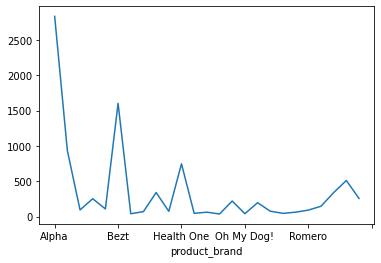

In [ ]:
#Test if the brands differentiate the consumers
GroupedData3=df.groupby(by="product_brand").size() # why size()?
print(GroupedData3.head())
len(GroupedData3) #there are 25 different products
GroupedData3.plot.line()

sales
4.73    17
4.98    32
6.59    23
6.94    35
7.31    13
dtype: int64


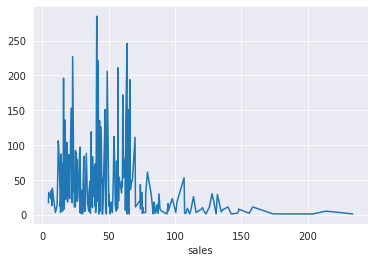

In [ ]:
#Test if sale differentiates the consumers
GroupedData4=df.groupby(by="sales").size() # why size()?
print(GroupedData4.head())
len(GroupedData4) #there are 25 different products
GroupedData4.plot.line()

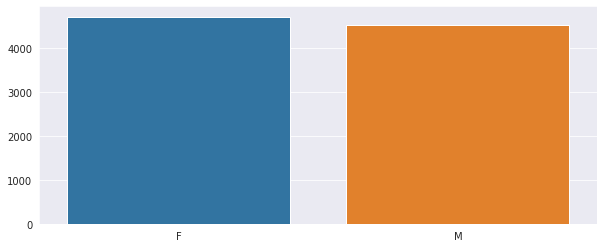

In [ ]:
genders = df.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()
# Futher check if gender affects other variables in R (Chi-test)

Married                                  4706
Single                                   3663
Domestic partner/serious relationship     846
Name: marital, dtype: int64


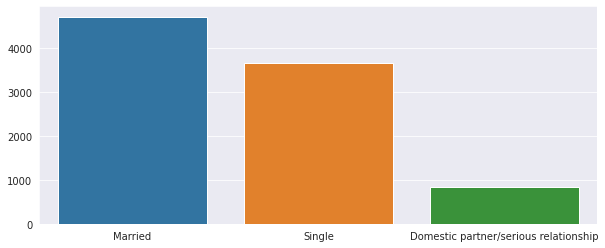

In [ ]:
#Test if marital status differentiates the consumers
marrige = df.marital.value_counts()
print(marrige)
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=marrige.index, y=marrige.values)
plt.show()

College graduate                4101
Some college or trade school    1946
High school graduate            1745
Post graduate                   1423
Name: education, dtype: int64


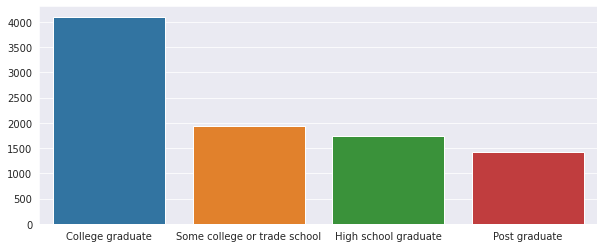

In [ ]:
#Test if education level differentiates the consumers
education = df.education.value_counts()
print(education)
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=education.index, y=education.values)
plt.show()

2       Less than $20,000
18      Less than $20,000
30      Less than $20,000
39      Less than $20,000
52      Less than $20,000
              ...        
9157    Less than $20,000
9166    Less than $20,000
9175    Less than $20,000
9191    Less than $20,000
9206    Less than $20,000
Name: income, Length: 587, dtype: object


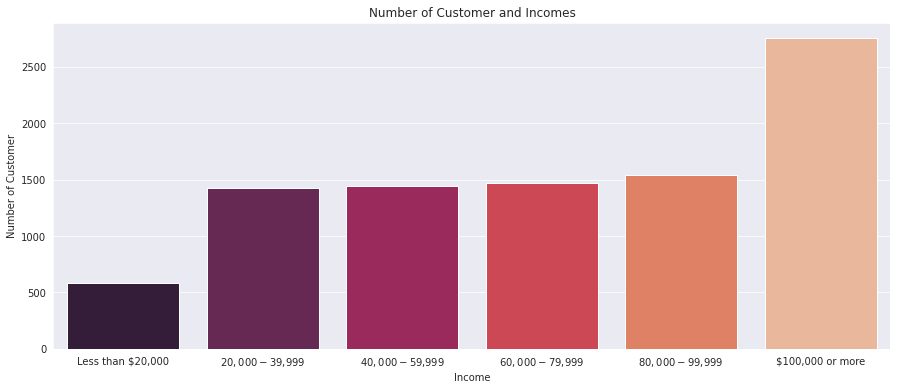

In [ ]:
incomebelow20k = df.income[df.income == "Less than $20,000"]
income20_39 = df.income[df.income == "$20,000 - $39,999"]
income40_59 = df.income[df.income == "$40,000 - $59,999"]
income60_79 = df.income[df.income == "$60,000 - $79,999"]
income80_99 = df.income[df.income == "$80,000 - $99,999"]
income100kabove = df.income[df.income == "$100,000 or more"]

print(incomebelow20k)

x = ["Less than $20,000","$20,000 - $39,999", "$40,000 - $59,999","$60,000 - $79,999","$80,000 - $99,999", "$100,000 or more",]
y = [len(incomebelow20k.values),len(income20_39.values),len(income40_59.values),len(income60_79.values),len(income80_99.values),len(income100kabove.values)] #data is imported by this code

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

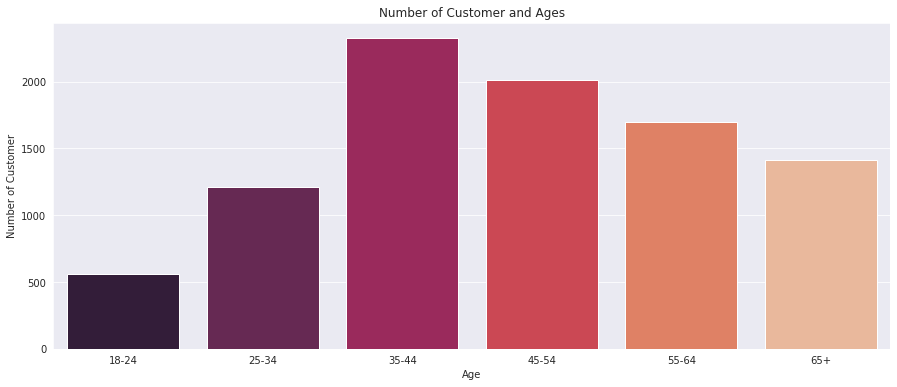

In [ ]:
age18_24 = df.age[df.age == "18-24"]
age25_34 = df.age[df.age == "25-34"]
age35_44 = df.age[df.age == "35-44"]
age45_54 = df.age[df.age == "45-54"]
age55_64 = df.age[df.age == "55-64"]
age65above = df.age[df.age == "65+"]

#print(age18_24)
#print(len(age18_24.values))



x = ["18-24","25-34","35-44","45-54","55-64","65+"]
y = [len(age18_24.values),len(age25_34.values),len(age35_44.values),len(age45_54.values),len(age55_64.values),len(age65above.values)] #data is imported by this code

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

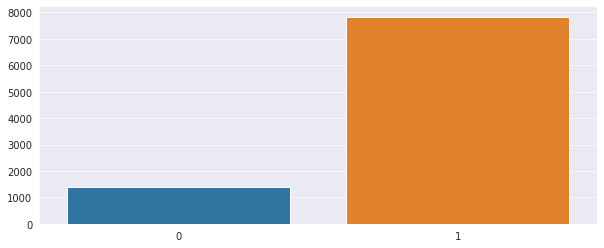

,ad_exp,product_id,product_brand,sales,customer_id,gender,city,st,zip,lat,lng,marital,education,income,age,prime
0,Sponsored Products,224143037,Seattle Gourmet,32.28,1223,M,Shreveport,LA,71130,32.6076,-93.7526,Single,College graduate,"$60,000 - $79,999",55-64,1
1,Don't recall seeing an ad,834182030,Garland Farms,65.49,2946,M,Fresno,CA,93794,36.7464,-119.6397,Single,High school graduate,"$60,000 - $79,999",35-44,1
2,Don't recall seeing an ad,950844039,Doggo,173.97,4448,M,Danbury,CT,6816,41.3089,-73.3637,Single,College graduate,"Less than $20,000",25-34,1
3,Sponsored Products,378059009,Alpha,127.96,4510,F,San Antonio,TX,78215,29.4413,-98.4793,Married,College graduate,"$20,000 - $39,999",25-34,1
4,Don't recall seeing an ad,151595003,Alpha,48.99,370,F,Boise,ID,83711,43.4599,-116.2440,Married,Some college or trade school,"$80,000 - $99,999",55-64,0


In [ ]:
prime = df.prime.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=prime.index, y=prime.values)
plt.show()

df.head()

In [30]:
#ad_exp, produc_brand, sales, gender, st, marital, education, income, age, prime, these variables may be considered in segmenting the customers
#convert categotical string-typed variables into numeric

# Be informed(from the lecturer's code): if you want segment the customers, you should create a new database whose primary key is customer ID.

# df['ad_exp'].replace(['Display/banner ad', 
#                     "Don't recall seeing an ad",
#                     'Some other type of ad',
#                     'Sponsored Brands',
#                     'Sponsored Products', 
#                     'Video ad'],
#                      [0, 1, 2, 3, 4, 5], inplace=True)

df['ad_exp'].value_counts()
df['ad_ind'] = np.where(df['ad_exp']=="Don't recall seeing an ad", 0, 1)
df['ad_ind'].value_counts()


1    6119
0    3096
Name: ad_ind, dtype: int64

In [31]:
df['marital'].value_counts()
df['ma_ind'] = np.where(df['marital']=="Single", 0, 1)
df['ma_ind'].value_counts()

1    5552
0    3663
Name: ma_ind, dtype: int64

In [32]:
categories_education = list(df['education'].value_counts().index)
df['education'].replace(categories_education,
                    list(range(df['education'].value_counts().count())), inplace=True)

categories_income = list(df['income'].value_counts().index)
df['income'].replace(categories_income,
                    list(range(df['income'].value_counts().count())), inplace=True)

In [33]:
df['product_count'] = (
    df.groupby(['customer_id'])['product_name'].transform('nunique')) # how many products the consutomer bought
df['product_count']

0       1
1       1
2       1
3       1
4       2
       ..
9210    2
9211    3
9212    3
9213    1
9214    1
Name: product_count, Length: 9215, dtype: int64

In [34]:
df['brand_count'] = (
    df.groupby(['customer_id'])['product_brand'].transform('nunique')) 
df['brand_count']

0       1
1       1
2       1
3       1
4       2
       ..
9210    1
9211    2
9212    3
9213    1
9214    1
Name: brand_count, Length: 9215, dtype: int64

In [42]:
df2=df.groupby('customer_id').agg({'ad_ind':'mean','price':'mean','prime':'mean','ma_ind':'mean','education':'mean','income':'mean','product_count':'mean','brand_count':'mean' })
df2

,ad_ind,price,prime,ma_ind,education,income,product_count,brand_count
customer_id,,,,,,,,
1,1.00,60.780000,1.0,0.0,0.0,4.0,1.0,1.0
2,1.00,73.990000,1.0,1.0,0.0,4.0,1.0,1.0
3,0.75,22.417500,0.0,0.0,3.0,0.0,4.0,4.0
4,1.00,28.166667,1.0,0.0,1.0,4.0,3.0,3.0
5,0.00,18.990000,1.0,0.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...
4996,0.00,44.380000,1.0,0.0,2.0,2.0,1.0,1.0
4997,1.00,39.060000,1.0,1.0,1.0,1.0,1.0,1.0
4998,0.50,42.475000,1.0,1.0,2.0,1.0,2.0,2.0


In [43]:
df2.reset_index(inplace=True)
df2



,customer_id,ad_ind,price,prime,ma_ind,education,income,product_count,brand_count
0,1,1.00,60.780000,1.0,0.0,0.0,4.0,1.0,1.0
1,2,1.00,73.990000,1.0,1.0,0.0,4.0,1.0,1.0
2,3,0.75,22.417500,0.0,0.0,3.0,0.0,4.0,4.0
3,4,1.00,28.166667,1.0,0.0,1.0,4.0,3.0,3.0
4,5,0.00,18.990000,1.0,0.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
4995,4996,0.00,44.380000,1.0,0.0,2.0,2.0,1.0,1.0
4996,4997,1.00,39.060000,1.0,1.0,1.0,1.0,1.0,1.0
4997,4998,0.50,42.475000,1.0,1.0,2.0,1.0,2.0,2.0
4998,4999,0.00,15.190000,0.0,0.0,1.0,0.0,1.0,1.0


In [44]:
df2.drop(["customer_id"], axis = 1, inplace=True)

In [16]:
# Original codes

categories_brand = list(df['product_brand'].value_counts().index)
df['product_brand'].replace(categories_brand,
                    list(range(df['product_brand'].value_counts().count())), inplace=True)

df['gender'].replace(["M","F"],
                     [1,0], inplace=True)

categories_st = list(df['st'].value_counts().index)
df['st'].replace(categories_st,
                    list(range(df['st'].value_counts().count())), inplace=True)

df['marital'].replace(["Single","Married","Domestic partner/serious relationship"],
                     [0,1,2], inplace=True)

categories_education = list(df['education'].value_counts().index)
df['education'].replace(categories_education,
                    list(range(df['education'].value_counts().count())), inplace=True)

categories_income = list(df['income'].value_counts().index)
df['income'].replace(categories_income,
                    list(range(df['income'].value_counts().count())), inplace=True)

categories_age = list(df['age'].value_counts().index)
df['age'].replace(categories_age,
                    list(range(df['age'].value_counts().count())), inplace=True)

categories_prime = list(df['prime'].value_counts().index)
df['prime'].replace(categories_prime,
                    list(range(df['prime'].value_counts().count())), inplace=True)

#ad_exp, produc_brand, sales, gender, st, marital, education, income, age, prime, these variables may be considered in segmenting the customers
#drop excessive variables
df.drop(["city","zip","lat","lng"], axis = 1, inplace=True)

df.head()

 


,ad_exp,product_id,product_brand,sales,customer_id,gender,st,marital,education,income,age,prime
0,4,224143037,6,32.28,1223,1,15,0,0,2,2,0
1,1,834182030,5,65.49,2946,1,1,0,2,2,0,0
2,1,950844039,17,173.97,4448,1,24,0,0,5,4,0
3,4,378059009,0,127.96,4510,0,0,1,0,4,4,0
4,1,151595003,0,48.99,370,0,35,1,1,1,2,1


In [37]:
df2.dtypes

ad_ind           float64
price            float64
prime            float64
ma_ind           float64
education        float64
income           float64
product_count    float64
brand_count      float64
dtype: object

In [ ]:
#list(df['product_brand'].value_counts().index) #问: 后缀的命名方式？

# Firstly I made a mistake: to try clustering model based on the original database whose primary key is sale_id (of each order).
# However, if we want segment the existing customers, the working database should focus on each customer.
# 

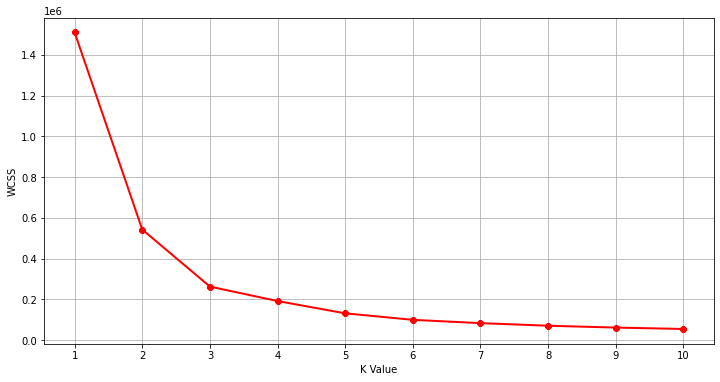

In [45]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

# let us go with 3 as the optimal segment number

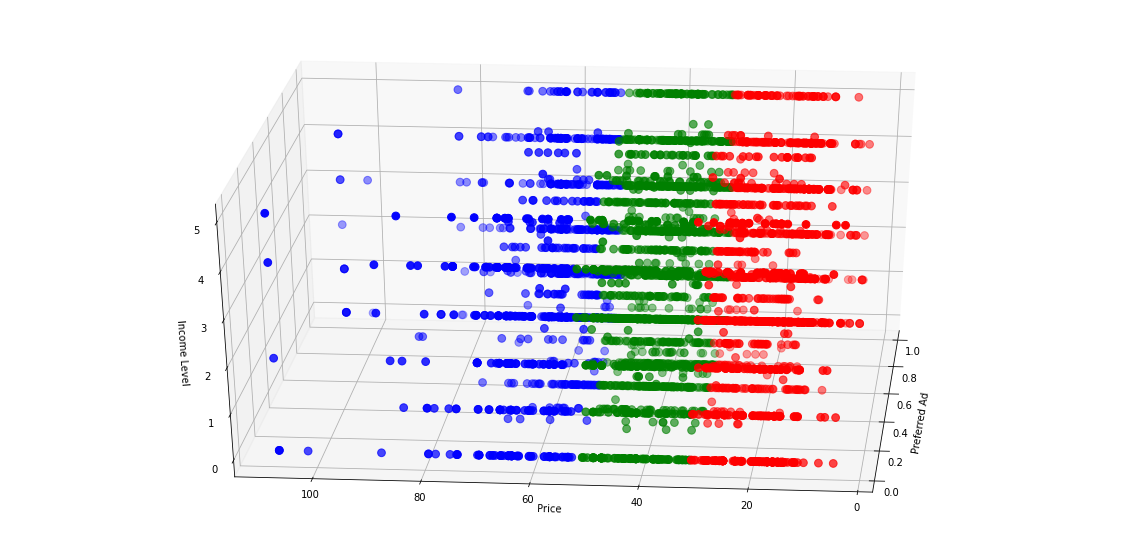

In [51]:
# to visualize the clustering in a 3 dimensioned model
# the 3 axises are marked as ad_ind, price, income (df2.iloc[:,[1,2,6]])

km = KMeans(n_clusters=3)
clusters = km.fit_predict(df2.iloc[:,[1,2,6]])
df2["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.ad_ind[df2.label == 0], df2.price[df2.label == 0], df2.income[df2.label == 0], c='blue', s=60)
ax.scatter(df2.ad_ind[df2.label == 1], df2.price[df2.label == 1], df2.income[df2.label == 1], c='red', s=60)
ax.scatter(df2.ad_ind[df2.label == 2], df2.price[df2.label == 2], df2.income[df2.label == 2], c='green', s=60)

# 3 segments. What are the above codes for?
ax.view_init(30, 185)
plt.xlabel("Preferred Ad")
plt.ylabel("Price")
ax.set_zlabel("Income Level")
plt.show()

In [49]:
df2

,ad_ind,price,prime,ma_ind,education,income,product_count,brand_count,label
0,1.00,60.780000,1.0,0.0,0.0,4.0,1.0,1.0,0
1,1.00,73.990000,1.0,1.0,0.0,4.0,1.0,1.0,0
2,0.75,22.417500,0.0,0.0,3.0,0.0,4.0,4.0,1
3,1.00,28.166667,1.0,0.0,1.0,4.0,3.0,3.0,1
4,0.00,18.990000,1.0,0.0,1.0,3.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
4995,0.00,44.380000,1.0,0.0,2.0,2.0,1.0,1.0,2
4996,1.00,39.060000,1.0,1.0,1.0,1.0,1.0,1.0,2
4997,0.50,42.475000,1.0,1.0,2.0,1.0,2.0,2.0,2
4998,0.00,15.190000,0.0,0.0,1.0,0.0,1.0,1.0,1


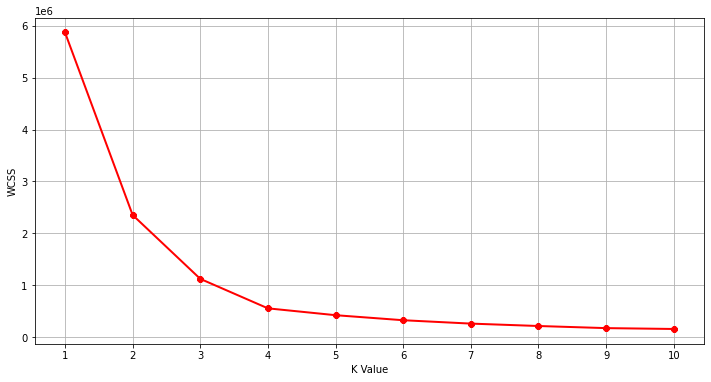

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,[0,2,7]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

# let us go with 5 as the optimal segment number


In [ ]:
# intialte the dafaframe?
df_model = pd.read_csv("/content/sample_data/Data0131.csv")
df_model.head()

,sale_id,sale_date,ad_exp,product_id,product_brand,product_name,price,qty,sales,customer_id,...,city,st,zip,lat,lng,marital,education,income,age,prime
0,1,2022-01-01,Sponsored Products,224143037,Seattle Gourmet,Seattle Gourmet Adult 7+ Small Bites Chicken M...,16.14,2,32.28,1223,...,Shreveport,LA,71130,32.6076,-93.7526,Single,College graduate,"$60,000 - $79,999",55-64,1
1,2,2022-01-01,Don't recall seeing an ad,834182030,Garland Farms,Garland Farms Healthy Grains Dry Dog Food with...,21.83,3,65.49,2946,...,Fresno,CA,93794,36.7464,-119.6397,Single,High school graduate,"$60,000 - $79,999",35-44,1
2,3,2022-01-01,Don't recall seeing an ad,950844039,Doggo,"Doggo Kibble Dry Dog Food, 20 lb, with Plant B...",57.99,3,173.97,4448,...,Danbury,CT,6816,41.3089,-73.3637,Single,College graduate,"Less than $20,000",25-34,1
3,4,2022-01-01,Sponsored Products,378059009,Alpha,"Alpha Shredded Blend High Protein, Adult Dry D...",63.98,2,127.96,4510,...,San Antonio,TX,78215,29.4413,-98.4793,Married,College graduate,"$20,000 - $39,999",25-34,1
4,5,2022-01-01,Don't recall seeing an ad,151595003,Alpha,"Alpha Natural Sensitive Systems, Skin & Coat S...",48.99,1,48.99,370,...,Boise,ID,83711,43.4599,-116.2440,Married,Some college or trade school,"$80,000 - $99,999",55-64,0


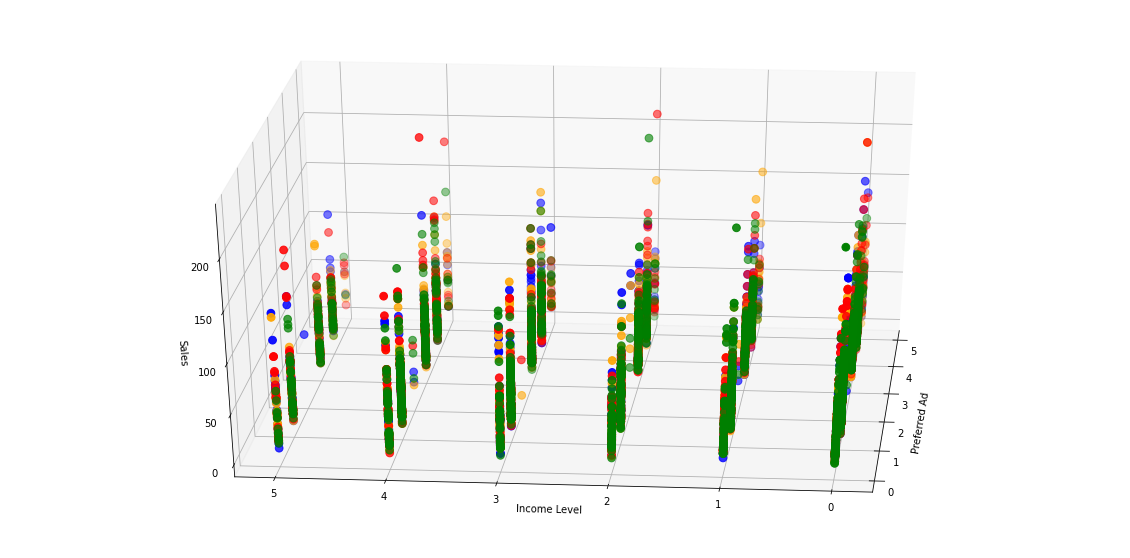

In [ ]:
# to visualize the clustering in a 3 dimensioned model
# the 3 axises are marked as Prefered Ad, Income Level and Sales

km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,[0,2,7]])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.ad_exp[df.label == 0], df.income[df.label == 0], df.sales[df.label == 0], c='blue', s=60)
ax.scatter(df.ad_exp[df.label == 1], df.income[df.label == 1], df.sales[df.label == 1], c='red', s=60)
ax.scatter(df.ad_exp[df.label == 2], df.income[df.label == 2], df.sales[df.label == 2], c='green', s=60)
ax.scatter(df.ad_exp[df.label == 3], df.income[df.label == 3], df.sales[df.label == 3], c='orange', s=60)
# ax.scatter(df.ad_exp[df.label == 4], df.income[df.label == 4], df.sales[df.label == 4], c='purple', s=60)
# 5 segments. What are the above codes for?
ax.view_init(30, 185)
plt.xlabel("Preferred Ad")
plt.ylabel("Income Level")
ax.set_zlabel('Sales')
plt.show()

In [11]:
df['income'].value_counts()

0    2754
1    1537
2    1469
3    1442
4    1426
5     587
Name: income, dtype: int64